#EDA dan Train, Test, Split


In [ ]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD

In [ ]:
df = pd.read_csv("/content/DataLiIon_SuhuVoltase.xlsx - Sheet1.csv")

In [ ]:
df

,suhu,voltase,data ke,Unnamed: 3
0,42,4.026,1,NaN
1,42,4.026,2,NaN
2,42,4.026,3,NaN
3,43,4.163,4,NaN
4,43,4.152,5,NaN
...,...,...,...,...
715,36,4.393,716,NaN
716,36,4.393,717,NaN
717,36,4.393,718,NaN
718,36,4.396,719,NaN


In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.describe()

,suhu,voltase
count,720.000000,720.000000
mean,38.862500,4.377671
std,1.745006,0.119771
min,36.000000,4.026000
25%,38.000000,4.281000
50%,39.000000,4.414000
75%,39.000000,4.488000
max,43.000000,4.503000


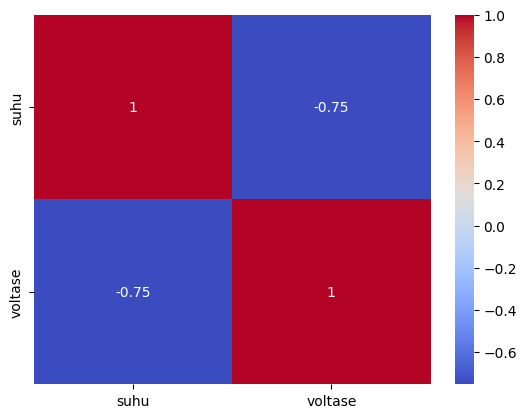

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

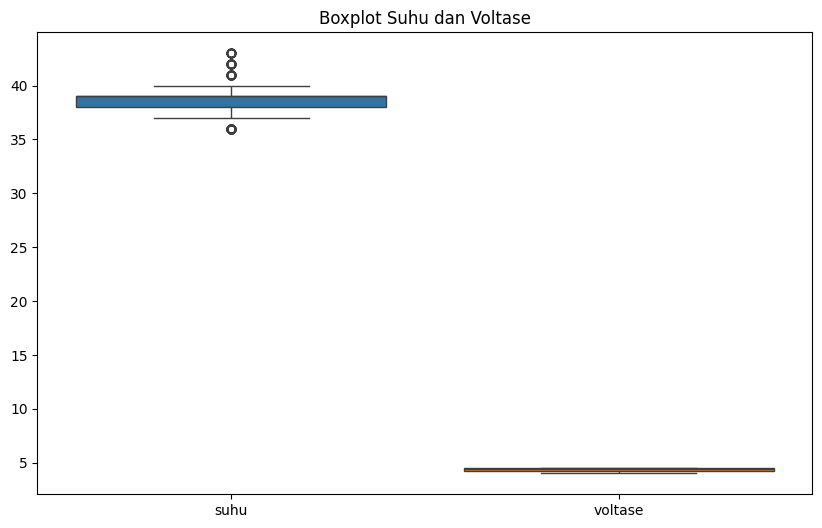

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot Suhu dan Voltase')
plt.show()

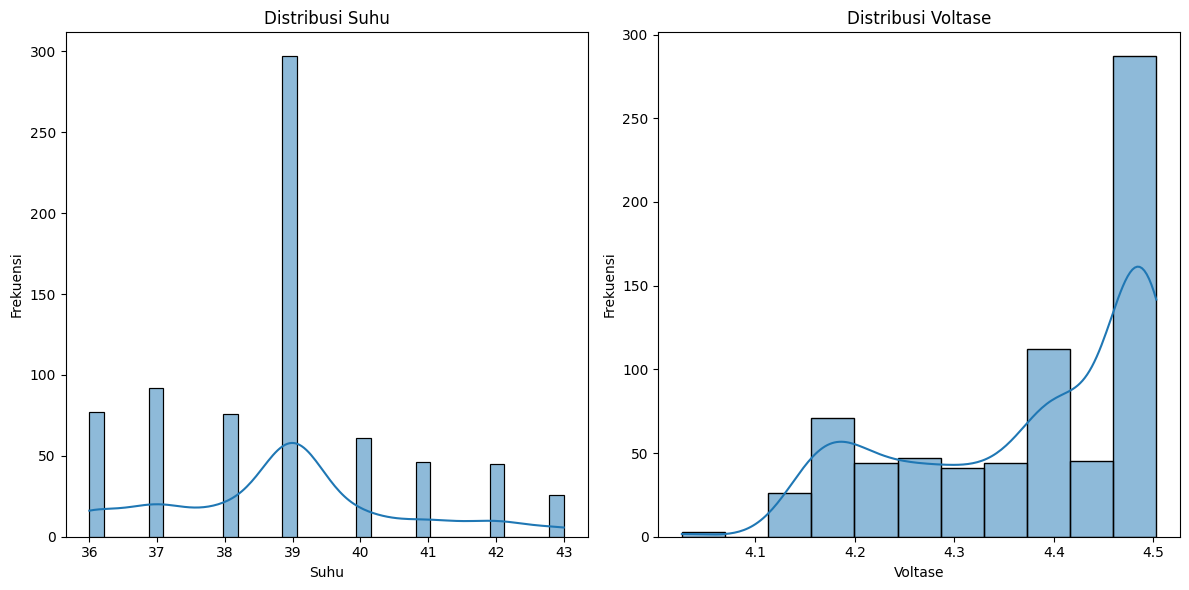

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['suhu'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.subplot(1, 2, 2)
sns.histplot(df['voltase'], kde=True)
plt.title('Distribusi Voltase')
plt.xlabel('Voltase')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

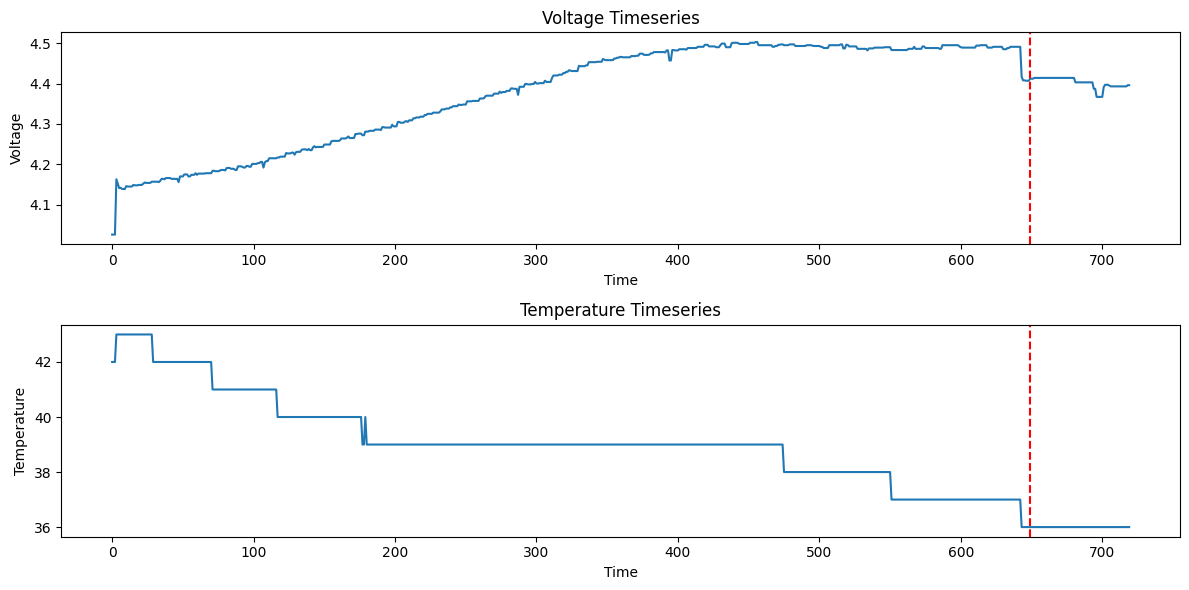

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Subplot pertama untuk Voltage Timeseries
plt.subplot(2, 1, 1)
plt.plot(df['voltase'])
plt.title('Voltage Timeseries')
plt.xlabel('Time')
plt.ylabel('Voltage')

# Menambahkan garis vertikal sebagai pemisah pada waktu ke 649
plt.axvline(x=649, color='red', linestyle='--', label='Pemisah')

# Subplot kedua untuk Temperature Timeseries
plt.subplot(2, 1, 2)
plt.plot(df['suhu'])
plt.title('Temperature Timeseries')
plt.xlabel('Time')
plt.ylabel('Temperature')

# Menambahkan garis vertikal sebagai pemisahke 649
plt.axvline(x=649, color='red', linestyle='--', label='Pemisah')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#Model

In [ ]:
# Data preprocessing
data = df.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data
#Data latih = 70% - Data ke 1-504
#Data validasi = 6% - data 505-547
#Data uji 24% - data ke 548-720
train_data, temp_data = train_test_split(data_scaled, train_size=0.7, shuffle=False)
val_data, test_data = train_test_split(temp_data, train_size=0.2, shuffle=False)


def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length, 0]  # Predict temperature
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 1  # Timestep/lookback
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

#Variasi

#10, 0.01, 50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training SimpleRNN...
Epoch 1/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0363 - mae: 0.0915 - val_loss: 4.2459e-04 - val_mae: 0.0205
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mae: 0.0252 - val_loss: 4.0484e-05 - val_mae: 0.0062
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2346e-04 - mae: 0.0221 - val_loss: 3.6829e-05 - val_mae: 0.0059
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7928e-04 - mae: 0.0192 - val_loss: 2.4595e-04 - val_mae: 0.0156
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5407e-04 - mae: 0.0170 - val_loss: 2.0645e-04 - val_mae: 0.0143
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.6558e-04 - mae: 0.0142 - val_loss: 2.6491e-05 - val_mae: 0.0051
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7642e-04 - mae: 0.0119 - val_loss: 7.8685e-05 - val_mae: 0.0088
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7433e-04 - mae: 0.0109 - val_loss: 3.3053e

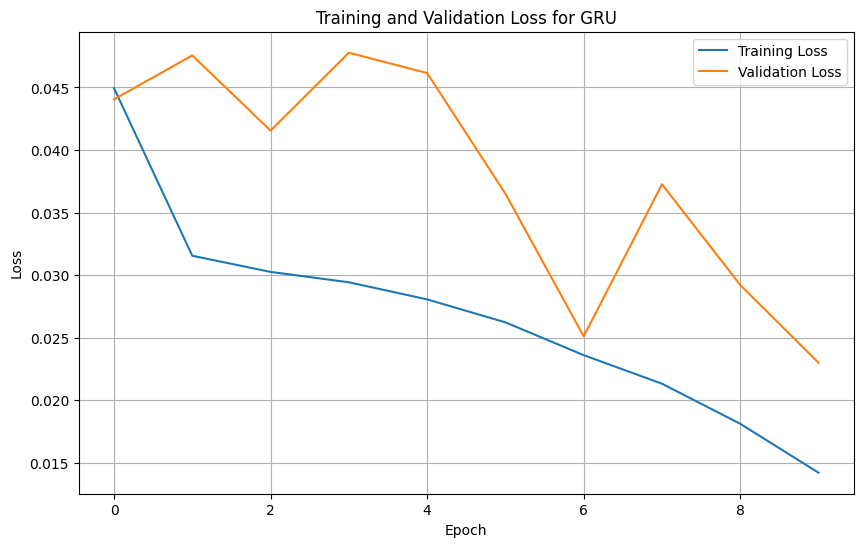

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


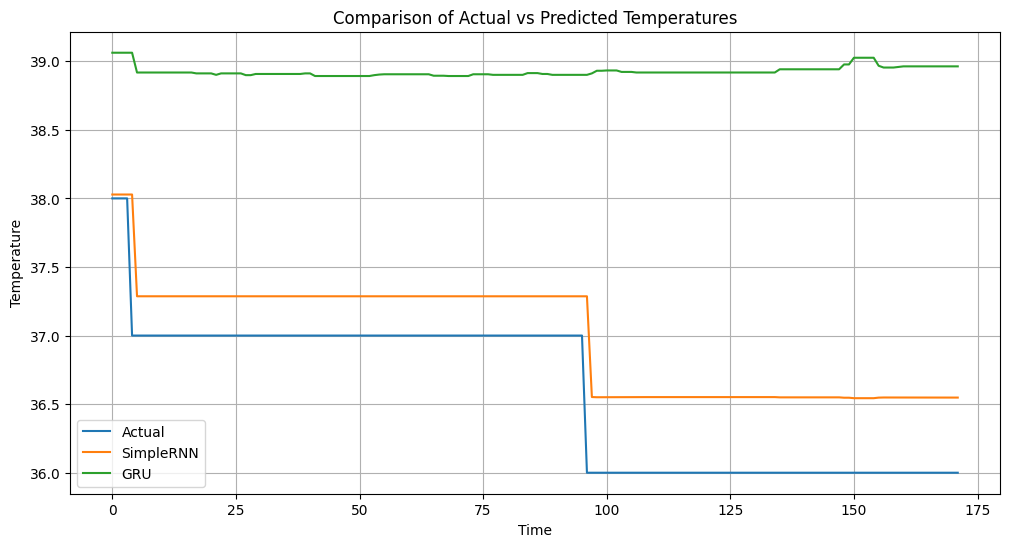

RMSE for SimpleRNN: 0.436806905531439
RMSE for GRU: 2.4065712270306405


In [ ]:
optim = SGD(learning_rate=0.01)
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI 50 GANTI KALAU MAU VARIASI#####
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.01)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=10,#####GANTI KALAU MAU VARIASI##### #Berubah dari 20 ke 10
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#10, 0.01, 100

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training SimpleRNN...
Epoch 1/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0250 - mae: 0.0839 - val_loss: 9.4142e-04 - val_mae: 0.0307
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0602e-04 - mae: 0.0230 - val_loss: 0.0020 - val_mae: 0.0443
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9744e-04 - mae: 0.0188 - val_loss: 0.0015 - val_mae: 0.0392
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8014e-04 - mae: 0.0163 - val_loss: 0.0015 - val_mae: 0.0382
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5909e-04 - mae: 0.0152 - val_loss: 0.0015 - val_mae: 0.0384
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0062e-04 - mae: 0.0122 - val_loss: 0.0010 - val_mae: 0.0322
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7120e-04 - mae: 0.0104 - val_loss: 0.0010 - val_mae: 0.0320
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5903e-04 - mae: 0.0100 - val_loss: 8.5193e-04 - val_mae: 0.029

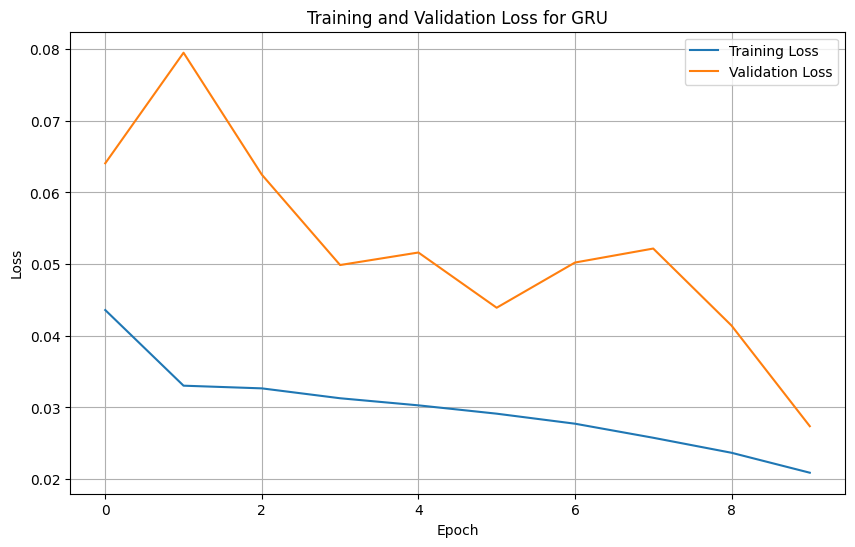

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


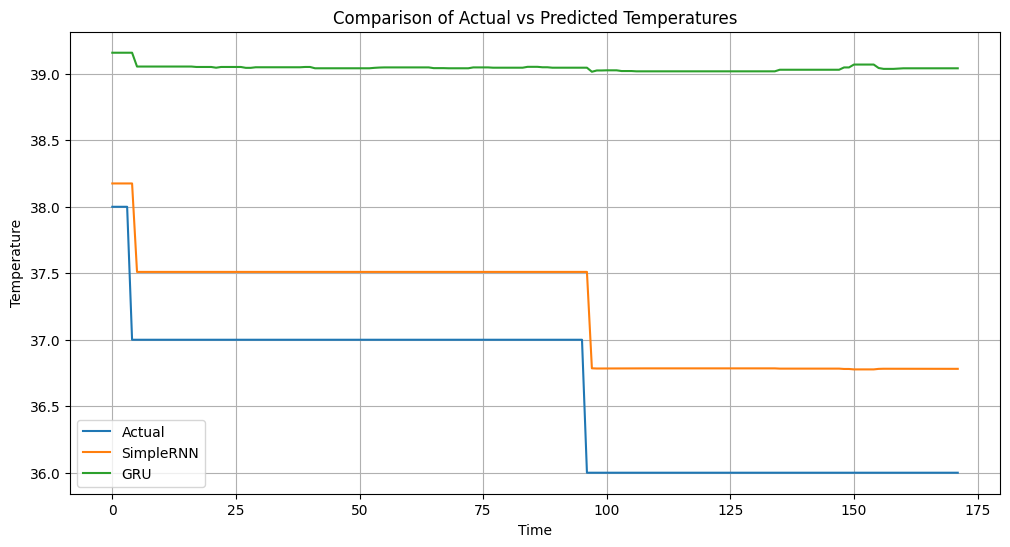

RMSE for SimpleRNN: 0.6535112617162653
RMSE for GRU: 2.517106340123632


In [ ]:
optim = SGD(learning_rate=0.01)
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI 50 GANTI KALAU MAU VARIASI#####
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.01)#####GANTI KALAU MAU VARIASI##### #Berubah dari 0.01 menjadi 0.02
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=10,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")


#10, 0.02, 50

Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0301 - mae: 0.0833 - val_loss: 0.0021 - val_mae: 0.0461
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 2.2875e-04 - val_mae: 0.0151
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6274e-04 - mae: 0.0176 - val_loss: 9.0632e-04 - val_mae: 0.0301
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1457e-04 - mae: 0.0162 - val_loss: 3.3540e-04 - val_mae: 0.0183
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1541e-04 - mae: 0.0155 - val_loss: 6.3395e-04 - val_mae: 0.0252
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0439e-04 - mae: 0.0121 - val_loss: 4.1767e-04 - val_mae: 0.0204
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.0826e-04 - mae: 0.0111 - val_loss: 5.7259e-04 - val_mae: 0.0239
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2694e-04 - mae: 0.0103 - val_loss: 7.4256e-04 - val_mae: 0.0272
Epoch 9/10
501/

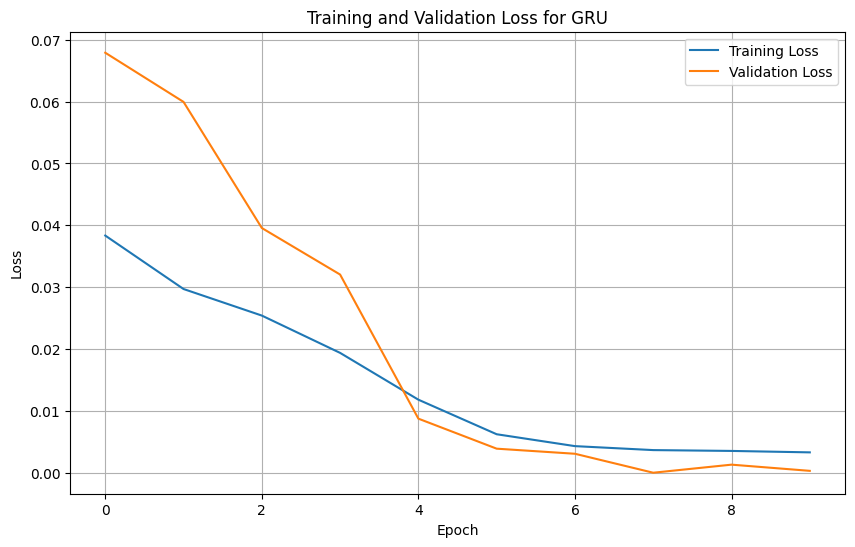

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


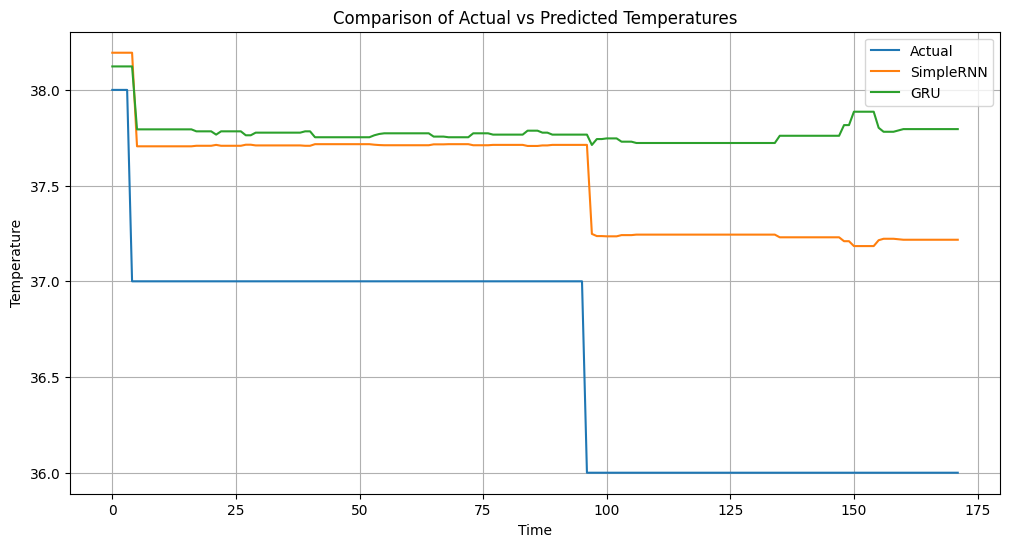

RMSE for SimpleRNN: 0.9765851719440263
RMSE for GRU: 1.3011708787081402


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.02)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=10,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history
# Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#10, 0.02, 100

Training SimpleRNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0191 - mae: 0.0867 - val_loss: 1.1157e-06 - val_mae: 8.8968e-04
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2288e-04 - mae: 0.0210 - val_loss: 3.2665e-04 - val_mae: 0.0181
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0241e-04 - mae: 0.0123 - val_loss: 3.3317e-04 - val_mae: 0.0183
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9376e-04 - mae: 0.0129 - val_loss: 6.9931e-05 - val_mae: 0.0084
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0727e-04 - mae: 0.0110 - val_loss: 1.1410e-04 - val_mae: 0.0107
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3008e-04 - mae: 0.0059 - val_loss: 1.2111e-04 - val_mae: 0.0110
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2676e-04 - mae: 0.0054 - val_loss: 8.3563e-05 - val_mae: 0.0091
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3571e-04 - mae: 0.0078 - val_loss: 5.6327e-05 - val_mae: 0.0075
Epo

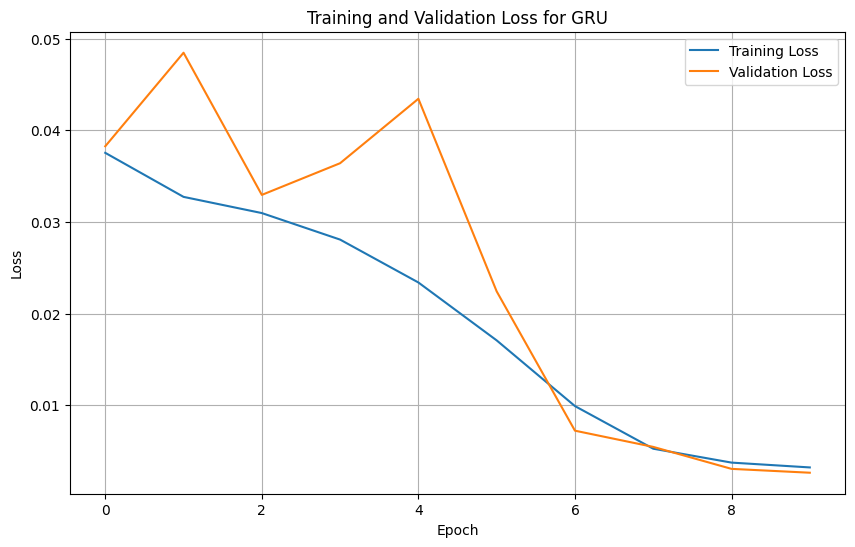

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


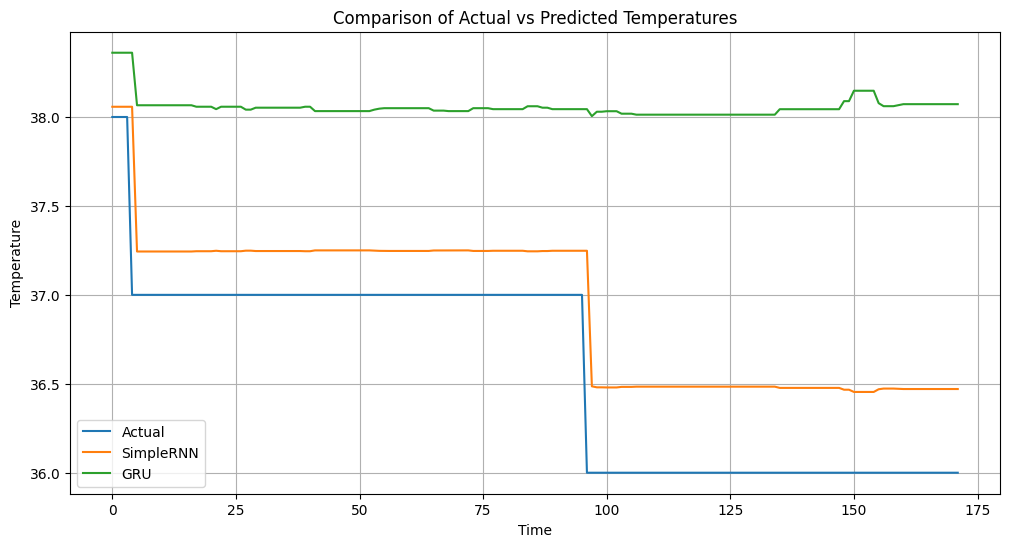

RMSE for SimpleRNN: 0.3836340808042239
RMSE for GRU: 1.5625996009598542


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.02)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=10,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#20, 0.01, 50

Training SimpleRNN...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0168 - mae: 0.0776 - val_loss: 6.4362e-04 - val_mae: 0.0254
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.0611e-04 - mae: 0.0209 - val_loss: 2.4245e-06 - val_mae: 0.0013
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9611e-04 - mae: 0.0155 - val_loss: 3.9293e-04 - val_mae: 0.0198
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3507e-04 - mae: 0.0144 - val_loss: 4.0867e-04 - val_mae: 0.0202
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8083e-04 - mae: 0.0121 - val_loss: 4.4336e-04 - val_mae: 0.0210
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6679e-04 - mae: 0.0092 - val_loss: 4.7294e-04 - val_mae: 0.0217
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3940e-04 - mae: 0.0105 - val_loss: 3.6393e-04 - val_mae: 0.0191
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5603e-04 - mae: 0.0091 - val_loss: 3.0242e-04 - val_mae: 0.0174
Epoch 9

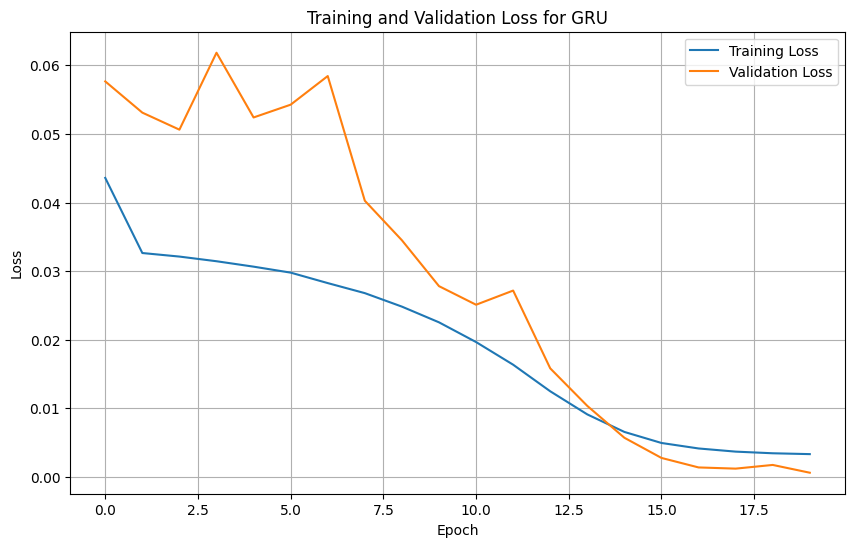

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


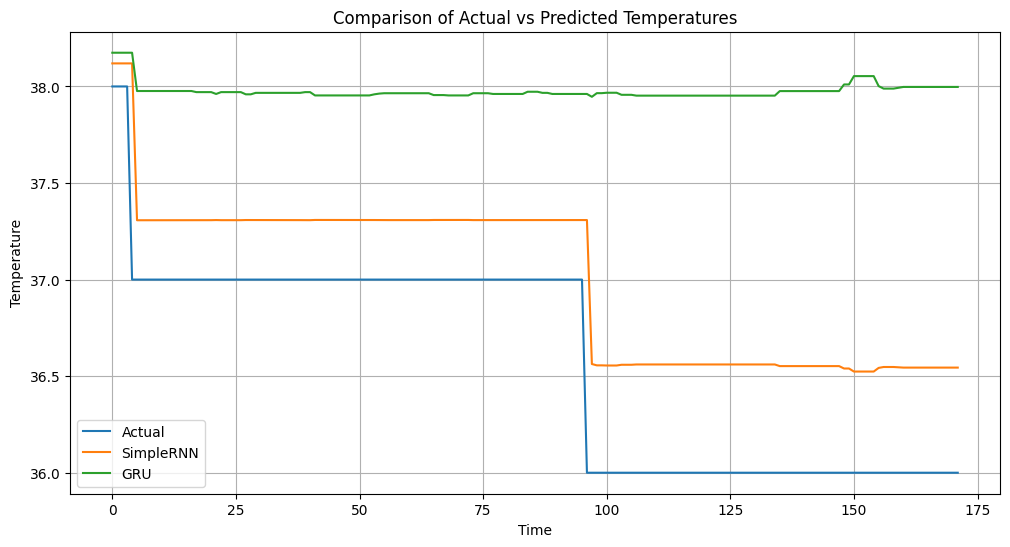

RMSE for SimpleRNN: 0.4480335775092561
RMSE for GRU: 1.4918097662032068


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.01)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=20,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#20, 0.01, 100

Training SimpleRNN...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0201 - mae: 0.0750 - val_loss: 6.4407e-04 - val_mae: 0.0254
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9007e-04 - mae: 0.0186 - val_loss: 3.9422e-04 - val_mae: 0.0198
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7112e-04 - mae: 0.0157 - val_loss: 3.8133e-04 - val_mae: 0.0195
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0902e-04 - mae: 0.0120 - val_loss: 6.8463e-05 - val_mae: 0.0082
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7292e-04 - mae: 0.0128 - val_loss: 1.3841e-04 - val_mae: 0.0117
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8919e-04 - mae: 0.0095 - val_loss: 3.0020e-04 - val_mae: 0.0173
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3459e-04 - mae: 0.0097 - val_loss: 7.6628e-05 - val_mae: 0.0087
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9867e-04 - mae: 0.0091 - val_loss: 7.0474e-05 - val_mae: 0.0084
Epoch 9

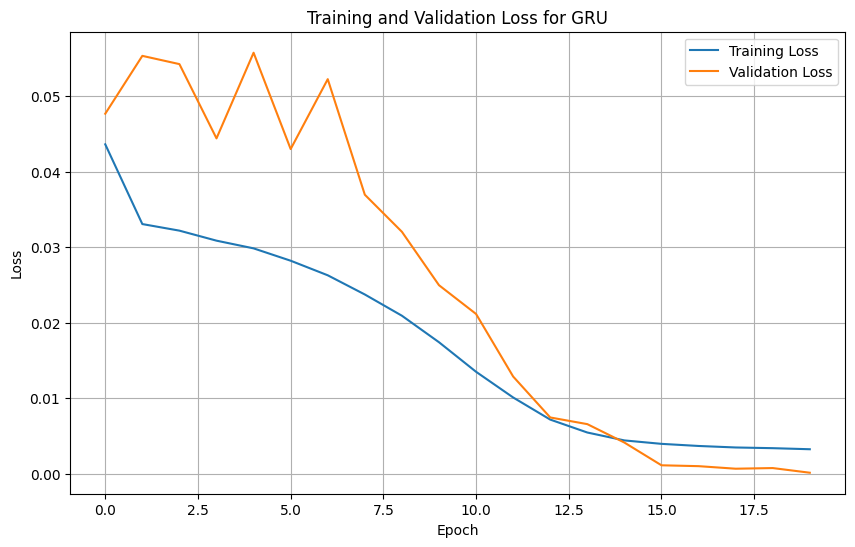

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


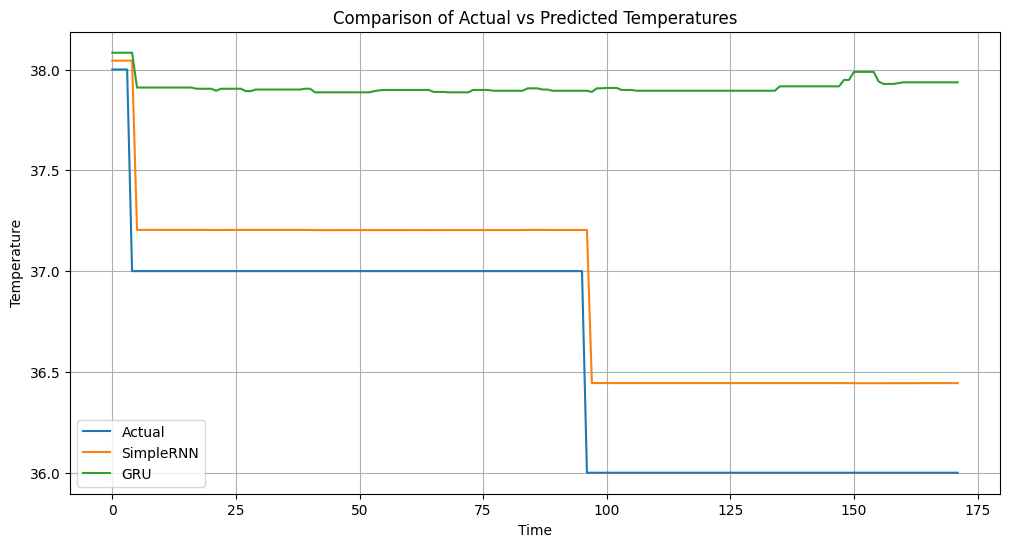

RMSE for SimpleRNN: 0.3507072865263935
RMSE for GRU: 1.433874160691935


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.01)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=20,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#20,0.02, 50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training SimpleRNN...
Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0187 - mae: 0.0708 - val_loss: 0.0016 - val_mae: 0.0401
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5183e-04 - mae: 0.0166 - val_loss: 0.0017 - val_mae: 0.0413
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1114e-04 - mae: 0.0117 - val_loss: 0.0016 - val_mae: 0.0401
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6050e-04 - mae: 0.0146 - val_loss: 4.4594e-04 - val_mae: 0.0211
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6902e-04 - mae: 0.0100 - val_loss: 8.8519e-04 - val_mae: 0.0298
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5560e-04 - mae: 0.0114 - val_loss: 6.0724e-04 - val_mae: 0.0246
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7060e-04 - mae: 0.0093 - val_loss: 8.4520e-04 - val_mae: 0.0291
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4774e-04 - mae: 0.0112 - val_loss: 2.9998e-04 - va

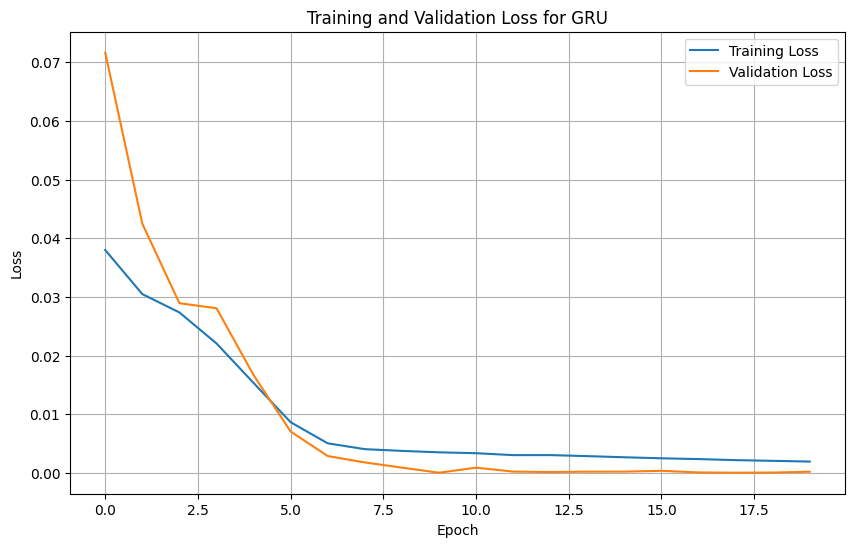

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


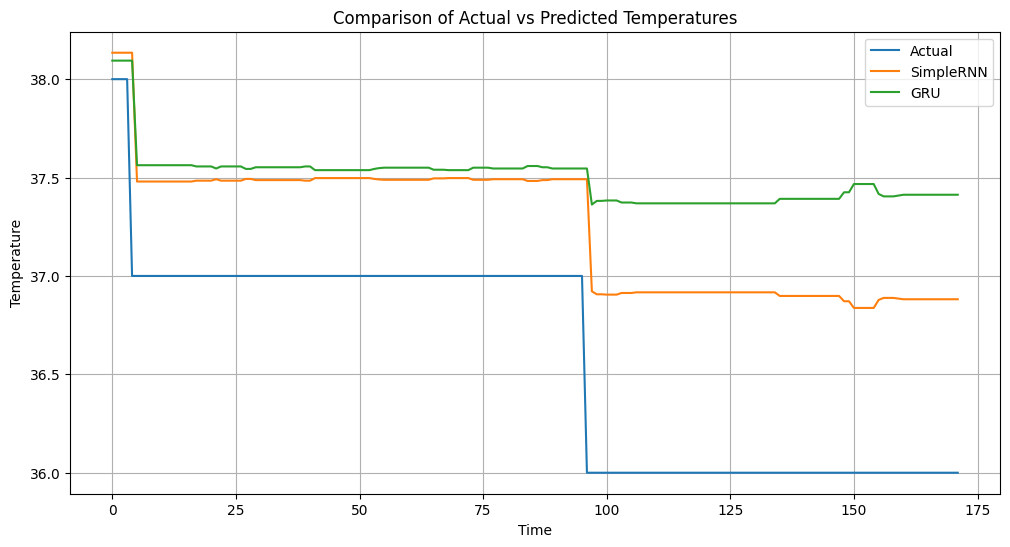

RMSE for SimpleRNN: 0.7068578621040145
RMSE for GRU: 1.012690234054963


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(50, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(50, activation='tanh',return_sequences=True))
    model.add(layer_type(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories={}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.02)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=20,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")

#20, 0.02, 100

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training SimpleRNN...
Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0186 - mae: 0.0730 - val_loss: 8.4134e-04 - val_mae: 0.0290
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6800e-04 - mae: 0.0210 - val_loss: 5.0804e-04 - val_mae: 0.0225
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0381e-04 - mae: 0.0153 - val_loss: 2.8276e-04 - val_mae: 0.0168
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3339e-04 - mae: 0.0124 - val_loss: 1.6488e-04 - val_mae: 0.0128
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5761e-04 - mae: 0.0089 - val_loss: 5.2040e-04 - val_mae: 0.0228
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.4767e-04 - mae: 0.0132 - val_loss: 2.8977e-04 - val_mae: 0.0170
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1506e-04 - mae: 0.0076 - val_loss: 6.7313e-05 - val_mae: 0.0082
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5355e-04 - mae: 0.0091 - val_loss: 9.6

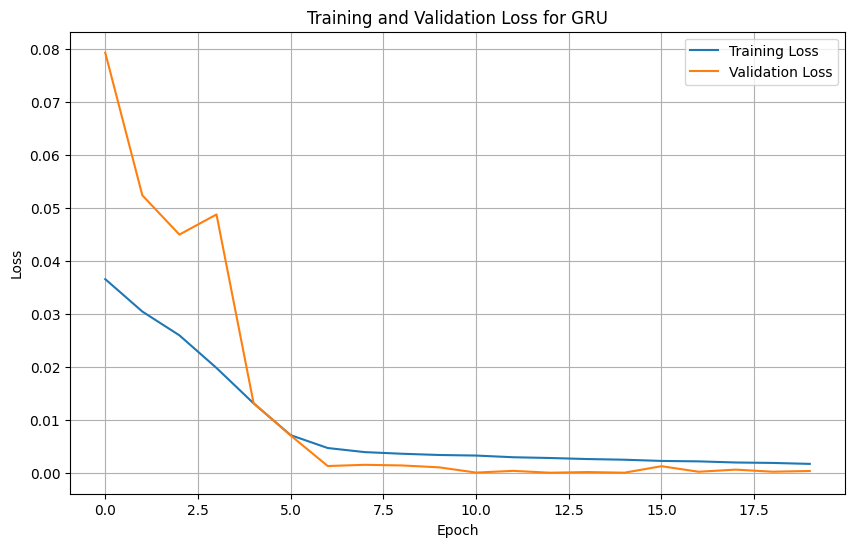

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


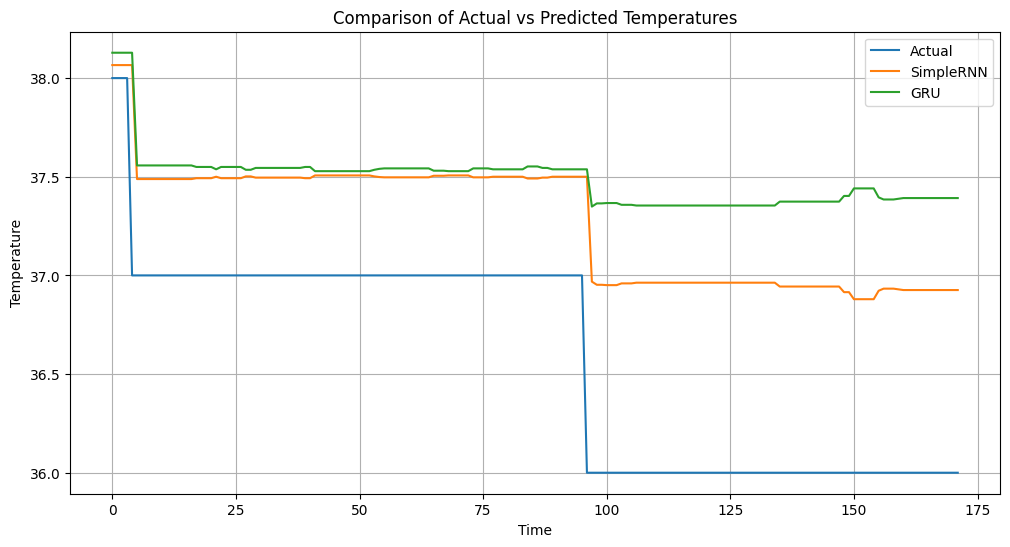

RMSE for SimpleRNN: 0.7345331096726189
RMSE for GRU: 1.0000616772932929


In [ ]:
def build_rnn_model(layer_type):
    model = Sequential()
    #####NILAI GANTI KALAU MAU VARIASI##### #Berubah dari 50 menjadi 100 neuron
    model.add(layer_type(100, activation='tanh', input_shape=(1, 2),return_sequences=True))
    model.add(layer_type(100, activation='tanh',return_sequences=True))
    model.add(layer_type(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optim, loss='mse')
    return model

# Train models
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN),
    "GRU": build_rnn_model(GRU)
}
histories={}
for name, model in models.items():
    print(f"Training {name}...")
    # Buat optimizer baru untuk setiap model
    optim = SGD(learning_rate=0.02)#####GANTI KALAU MAU VARIASI#####
    model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mae'])

    # Melatih model
    history = model.fit(
        X_train, y_train,
        epochs=20,#####GANTI KALAU MAU VARIASI#####
        batch_size=1,
        validation_data=(X_val, y_val),
    )
# Simpan hasil pelatihan
histories[name] = history.history

    # Evaluasi model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"{name} Loss: {loss}")
for name, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))), axis=1))[:,0]
for name, pred in predictions.items():
    predictions[name] = scaler.inverse_transform(np.concatenate((pred, np.zeros_like(pred)), axis=1))[:,0]

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual')
for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
for name, pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test_original, pred))
    print(f"RMSE for {name}: {rmse}")